In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append('..')
from capacity_management.src.cost_simulation import (
    simulate_yield_costs,
    simulate_2_school_costs,
    optimize_2sch,
    heuristic_set_capacity,
    compute_cdf_inflate_sep, simulate_multi_school_costs,
)

ImportError: cannot import name 'simulate_yield_costs' from 'capacity_management.src.cost_simulation' (../capacity_management/src/cost_simulation.py)

## Two Schools, Same Size - together vs separate

In [46]:
p = 0.15
co = 10; cu = 1
T = 1000
q1 = q2 = 44
qhat1_sep = qhat2_sep = heuristic_set_capacity(q1, co, cu, p)
qhat1_chain = qhat1_sep
qhat2_chain = heuristic_set_capacity(q2 + q1, co, cu, p) - qhat1_chain

In [47]:
qhat1_sep, qhat2_sep

(48, 48)

In [48]:
qhat1_chain, qhat2_chain

(48, 50)

In [49]:
def heuristic_set_capacity_chain(true_caps, co, cu, p):
    running_true_cap = 0 
    running_inf_cap = 0 
    inf_caps = []
    for q in true_caps:
        running_true_cap += q
        qhat = heuristic_set_capacity(running_true_cap, co, cu, p) - running_inf_cap
        running_inf_cap += qhat
        inf_caps.append(qhat)
    return np.array(inf_caps)

def heuristic_set_capacity_independent(true_caps, co, cu, p):
    inf_caps = []
    for q in true_caps:
        qhat = heuristic_set_capacity(q, co, cu, p) 
        inf_caps.append(qhat)
    return np.array(inf_caps)

In [50]:
heuristic_set_capacity_chain([44, 44], co, cu, p)

array([48, 50])

In [51]:
heuristic_set_capacity_independent([44, 44], co, cu, p)

array([48, 48])

In [52]:
true_caps = np.array([44,44])
qhat_chain = heuristic_set_capacity_chain(true_caps, co, cu, p)
np.random.seed(0)
simulate_multi_school_costs(true_caps, qhat_chain, co, cu, T, p)

array([[0.86 , 3.325],
       [0.84 , 4.961]])

In [55]:
qhat_indep = heuristic_set_capacity_independent(true_caps, co, cu, p)
np.random.seed(0)
cost = simulate_multi_school_costs(true_caps, qhat_indep, co, cu, T, p)
sch_cost = np.sum(cost, axis=1)
total_cost = sum(sch_cost)
print('total_cost', total_cost)
sch_cost

total_cost 10.971


array([4.185, 6.786])

In [54]:
qhat_chain

array([48, 50])

In [31]:
qhat_chain - true_caps

array([4, 6])

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append('..')
from capacity_management.src.cost_simulation import CostSimulator

In [2]:
cs = CostSimulator(co=10, cu=1, iters=10, prob=0.15, true_caps=np.array([40,40]), inf_strategy="independent")
cs.simulate()

{'total_cost': 10.8,
 'school_costs': array([5.2, 5.6]),
 'school_overage_costs': array([2., 0.]),
 'school_underage_costs': array([3.2, 5.6]),
 'avg_underfill/movers': 5.6,
 'raw_inflation': array([4, 4]),
 'pct_inflation': array([0.1, 0.1])}

In [6]:
cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([40]*10), inf_strategy="chain")
cs.chaining_inflation_difference()

array([1.  , 1.25, 1.5 , 1.5 , 1.5 , 1.5 , 1.75, 1.5 , 1.5 , 1.75])

In [13]:
cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([40,50]), inf_strategy="chain")
cs.simulate()

{'total_cost': 9.565000000000001,
 'school_costs': array([3.87 , 5.695]),
 'school_overage_costs': array([1.23, 0.62]),
 'school_underage_costs': array([2.64 , 5.075]),
 'avg_underfill': 5.109,
 'raw_inflation': array([4, 6]),
 'pct_inflation': array([0.1 , 0.12]),
 'avg_movers': 0.02}

In [14]:
cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([40,60]), inf_strategy="chain")
cs.simulate()

{'total_cost': 10.252,
 'school_costs': array([3.931, 6.321]),
 'school_overage_costs': array([1.2 , 1.19]),
 'school_underage_costs': array([2.731, 5.131]),
 'avg_underfill': 5.191,
 'raw_inflation': array([4, 8]),
 'pct_inflation': array([0.1       , 0.13333333]),
 'avg_movers': 0.029}

In [15]:
cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([50,40]), inf_strategy="chain")
cs.simulate()

{'total_cost': 10.315,
 'school_costs': array([4.627, 5.688]),
 'school_overage_costs': array([1.4 , 0.64]),
 'school_underage_costs': array([3.227, 5.048]),
 'avg_underfill': 5.09,
 'raw_inflation': array([5, 5]),
 'pct_inflation': array([0.1  , 0.125]),
 'avg_movers': 0.019}

In [16]:
cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([60,40]), inf_strategy="chain")
cs.simulate()

{'total_cost': 10.461,
 'school_costs': array([4.626, 5.835]),
 'school_overage_costs': array([0.94, 1.23]),
 'school_underage_costs': array([3.686, 4.605]),
 'avg_underfill': 4.651,
 'raw_inflation': array([6, 6]),
 'pct_inflation': array([0.1 , 0.15]),
 'avg_movers': 0.065}

In [43]:
caps = [40, 50, 60, 70, 80]
metrics = {}
np.random.seed(0)
for q1 in caps:
    for q2 in caps:
        cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([60,40]), inf_strategy="chain")
        metrics[(q1,q2)] = cs.simulate()

In [44]:
cost_array = np.zeros((5,5))
underfill_array = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        cost_array[i,j] = metrics[(caps[i], caps[j])]['total_cost']
        underfill_array[i,j] = metrics[(caps[i], caps[j])]['avg_underfill']

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(30.5, 0.5, 'School 1 True Capacity')

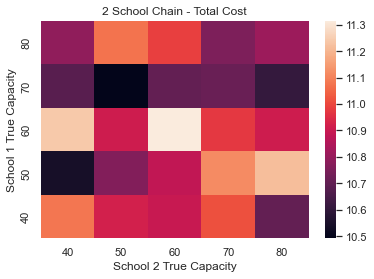

In [46]:
ax = sns.heatmap(cost_array, xticklabels=caps, yticklabels=caps)
ax.invert_yaxis()
plt.title("2 School Chain - Total Cost")
plt.xlabel('School 2 True Capacity')
plt.ylabel('School 1 True Capacity')

Text(30.5, 0.5, 'School 1 True Capacity')

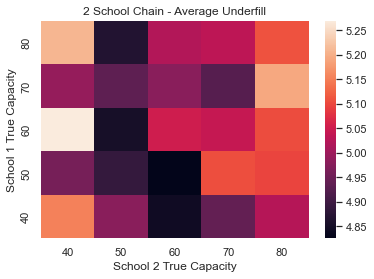

In [47]:
ax = sns.heatmap(underfill_array, xticklabels=caps, yticklabels=caps)
ax.invert_yaxis()
plt.title("2 School Chain - Average Underfill")
plt.xlabel('School 2 True Capacity')
plt.ylabel('School 1 True Capacity')

In [48]:
indep_cost = np.zeros((5,5))
indep_underfill = np.zeros((5,5))
np.random.seed(0)
for i, q1 in enumerate(caps):
    for j, q2 in enumerate(caps):
        cs = CostSimulator(co=10, cu=1, iters=1000, prob=0.15, true_caps=np.array([60,40]), inf_strategy="independent")
        tmp = cs.simulate()
        indep_cost[i,j] = tmp['total_cost']
        indep_underfill[i,j] = tmp['avg_underfill']

Text(30.5, 0.5, 'School 1 True Capacity')

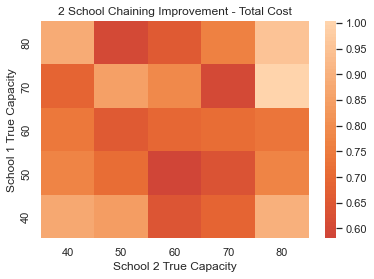

In [60]:
ax = sns.heatmap(indep_cost-cost_array, xticklabels=caps, yticklabels=caps, center=0)
ax.invert_yaxis()
plt.title("2 School Chaining Improvement - Total Cost")
plt.xlabel('School 2 True Capacity')
plt.ylabel('School 1 True Capacity')

Text(30.5, 0.5, 'School 1 True Capacity')

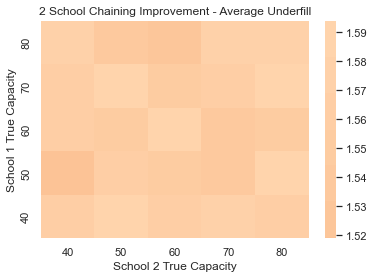

In [59]:
ax = sns.heatmap(-underfill_array+indep_underfill, xticklabels=caps, yticklabels=caps, center=0)
ax.invert_yaxis()
plt.title("2 School Chaining Improvement - Average Underfill")
plt.xlabel('School 2 True Capacity')
plt.ylabel('School 1 True Capacity')

In [63]:
cost_per_student = indep_cost-cost_array
underfill_per_seat = -underfill_array+indep_underfill
for i, q1 in enumerate(caps):
    for j, q2 in enumerate(caps):
        cost_per_student[i,j] = cost_per_student[i,j]/(q1+q2)
        underfill_per_seat[i,j] = underfill_per_seat[i,j]/(q1+q2)

Text(30.5, 0.5, 'School 1 True Capacity')

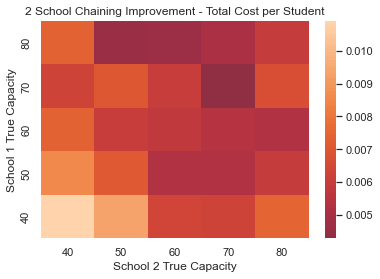

In [66]:
ax = sns.heatmap(cost_per_student, xticklabels=caps, yticklabels=caps, center=0)
ax.invert_yaxis()
plt.title("2 School Chaining Improvement - Total Cost per Student")
plt.xlabel('School 2 True Capacity')
plt.ylabel('School 1 True Capacity')

Text(30.5, 0.5, 'School 1 True Capacity')

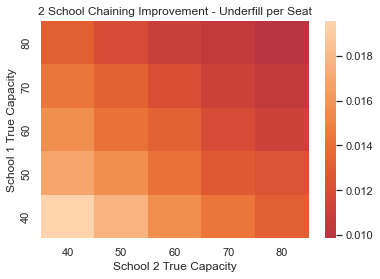

In [67]:
ax = sns.heatmap(underfill_per_seat, xticklabels=caps, yticklabels=caps, center=0)
ax.invert_yaxis()
plt.title("2 School Chaining Improvement - Underfill per Seat")
plt.xlabel('School 2 True Capacity')
plt.ylabel('School 1 True Capacity')

# Grid Search for Optimal Costs

In [7]:
from itertools import product

In [17]:
co = 10
cu = 1
iters=1000
p = 0.15
true_caps = np.array([40]*5)


cs = CostSimulator(co, cu, iters, p, true_caps)
int_lengths = true_caps*p/(1-p)
possible_caps = [np.arange(true_caps[i], true_caps[i]+int_lengths[i]+1) for i in range(len(true_caps))]
min_cost = np.inf
best_capacities = None
for caps in product(*possible_caps):
    inf_caps = np.array(caps).astype(int)
    cs.simulate_multi_school_costs(inf_caps)
    cost = cs.evaluation_metrics(inf_caps)['total_cost']
    if cost < min_cost:
        min_cost = cost 
        best_capacities = inf_caps

In [18]:
best_capacities

array([44, 47, 47, 47, 45])

In [19]:
cs.inf_strategy = 'chain'
cs.simulate()

{'total_cost': 31.873,
 'school_costs': array([4.146, 5.305, 6.62 , 7.473, 8.329]),
 'school_overage_costs': array([1.39, 0.72, 0.95, 0.78, 0.61]),
 'school_underage_costs': array([2.756, 4.585, 5.67 , 6.693, 7.719]),
 'avg_underfill/movers': 7.74,
 'raw_inflation': array([4, 5, 6, 6, 6]),
 'pct_inflation': array([0.1  , 0.125, 0.15 , 0.15 , 0.15 ])}

In [20]:
cs.inf_strategy = 'independent'
cs.simulate()

{'total_cost': 41.239999999999995,
 'school_costs': array([ 3.939,  5.64 ,  7.955, 10.535, 13.171]),
 'school_overage_costs': array([1.16, 0.25, 0.06, 0.01, 0.02]),
 'school_underage_costs': array([ 2.779,  5.39 ,  7.895, 10.525, 13.151]),
 'avg_underfill/movers': 13.154,
 'raw_inflation': array([4, 4, 4, 4, 4]),
 'pct_inflation': array([0.1, 0.1, 0.1, 0.1, 0.1])}